In [1]:
from risk_management.risk_checker import RiskChecker
from utils.plots import ChartPlotter
from core.strategy_loader import load_all_strategies
from indicators.all_indicators import calculate_volume_heatmap
from indicators.support_resistance import SupportResistancePivotIndicator
from indicators.ema import EMAIndicator
from indicators.vol_heatmap import VolumeHeatmapIndicator
from indicators.sr_volume_boxes import SupportResistanceVolumeBoxesIndicator
from indicators.sr_indicator_v2 import SupportResistanceVolumeBoxesIndicatorV2
from IPython.display import display, Markdown
import pandas as pd

from data import DataManager
from utils import compute_sr_boxes, plot_sr_boxes
load_all_strategies()

C:\Users\tzhang\PycharmProjects\taoquant\.venv\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
# ------------------------------------------------------------------
# Load 15m OHLCV for the past 30 days from OKX
# ------------------------------------------------------------------
manager = DataManager()
end_time = pd.Timestamp.utcnow().floor("min")
start_time = end_time - pd.Timedelta(days=200)
symbol = 'BTCUSDT'
print(f"Getting {symbol} data from {start_time} to {end_time}")
btc_15m = manager.get_klines(
    symbol=symbol,
    timeframe="15m",
    start=start_time,
    end=end_time,
    source="okx",
)

btc_4h = manager.get_klines(
    symbol=symbol,
    timeframe="4h",
    start=start_time,
    end=end_time,
    source="okx",
)

btc_1d = manager.get_klines(
    symbol=symbol,
    timeframe="1d",
    start=start_time,
    end=end_time,
    source="okx",
    #use_cache=False,
)

Getting BTCUSDT data from 2025-05-08 20:41:00+00:00 to 2025-11-24 20:41:00+00:00


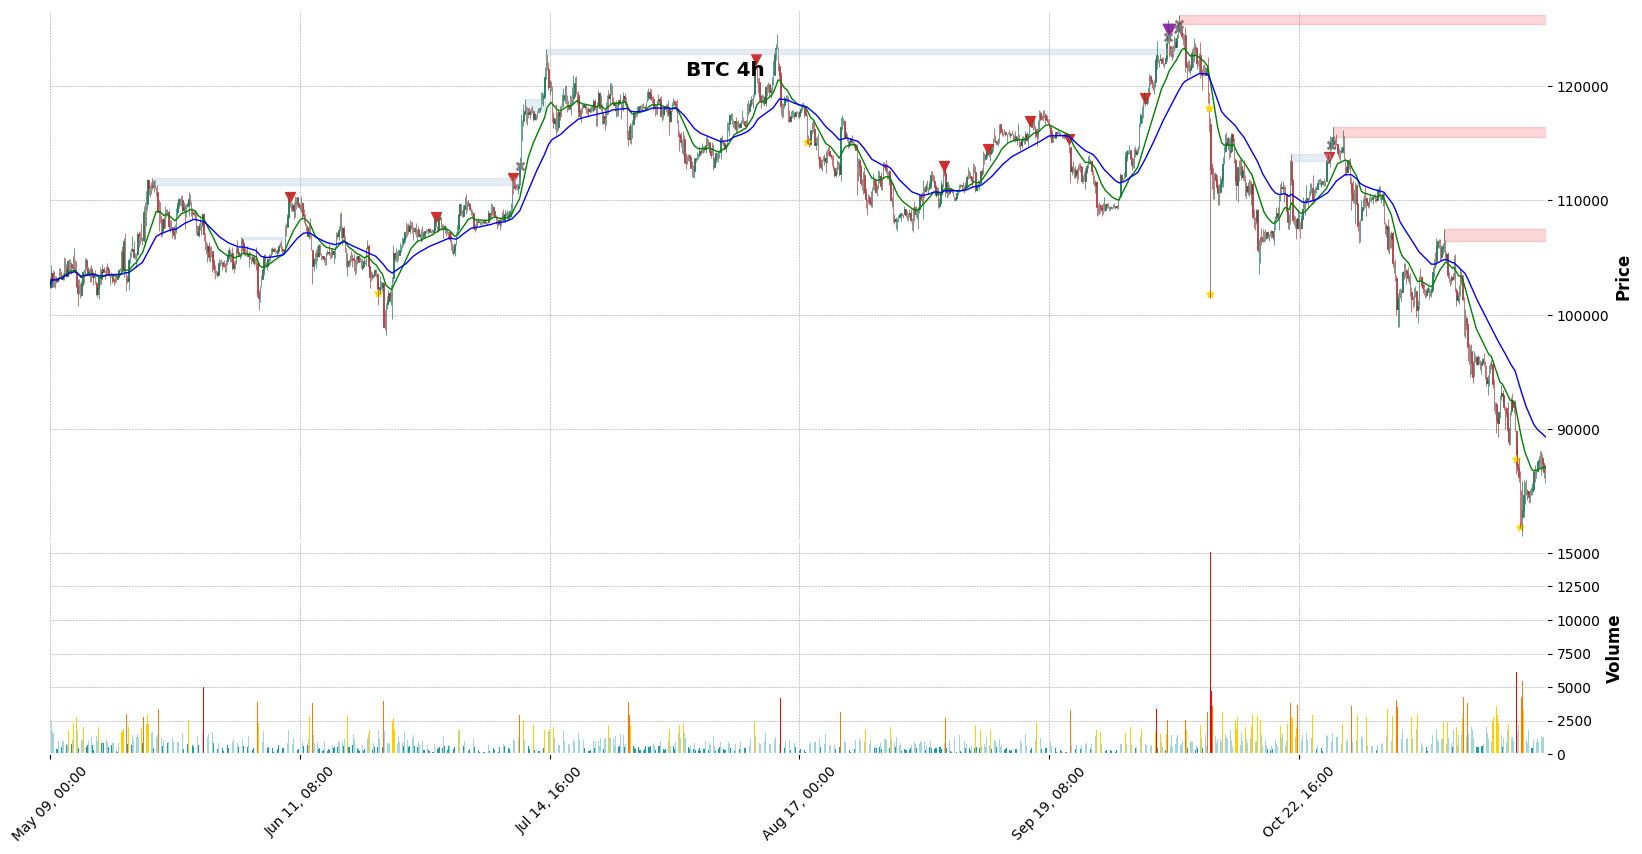

In [3]:
plotter = ChartPlotter([
  EMAIndicator(spans=[20, 50]),
  VolumeHeatmapIndicator(),
  SupportResistanceVolumeBoxesIndicatorV2(lookback=20, volume_length=2, box_width_factor=1.0),
])
plotter.plot(btc_4h, title="BTC 4h")

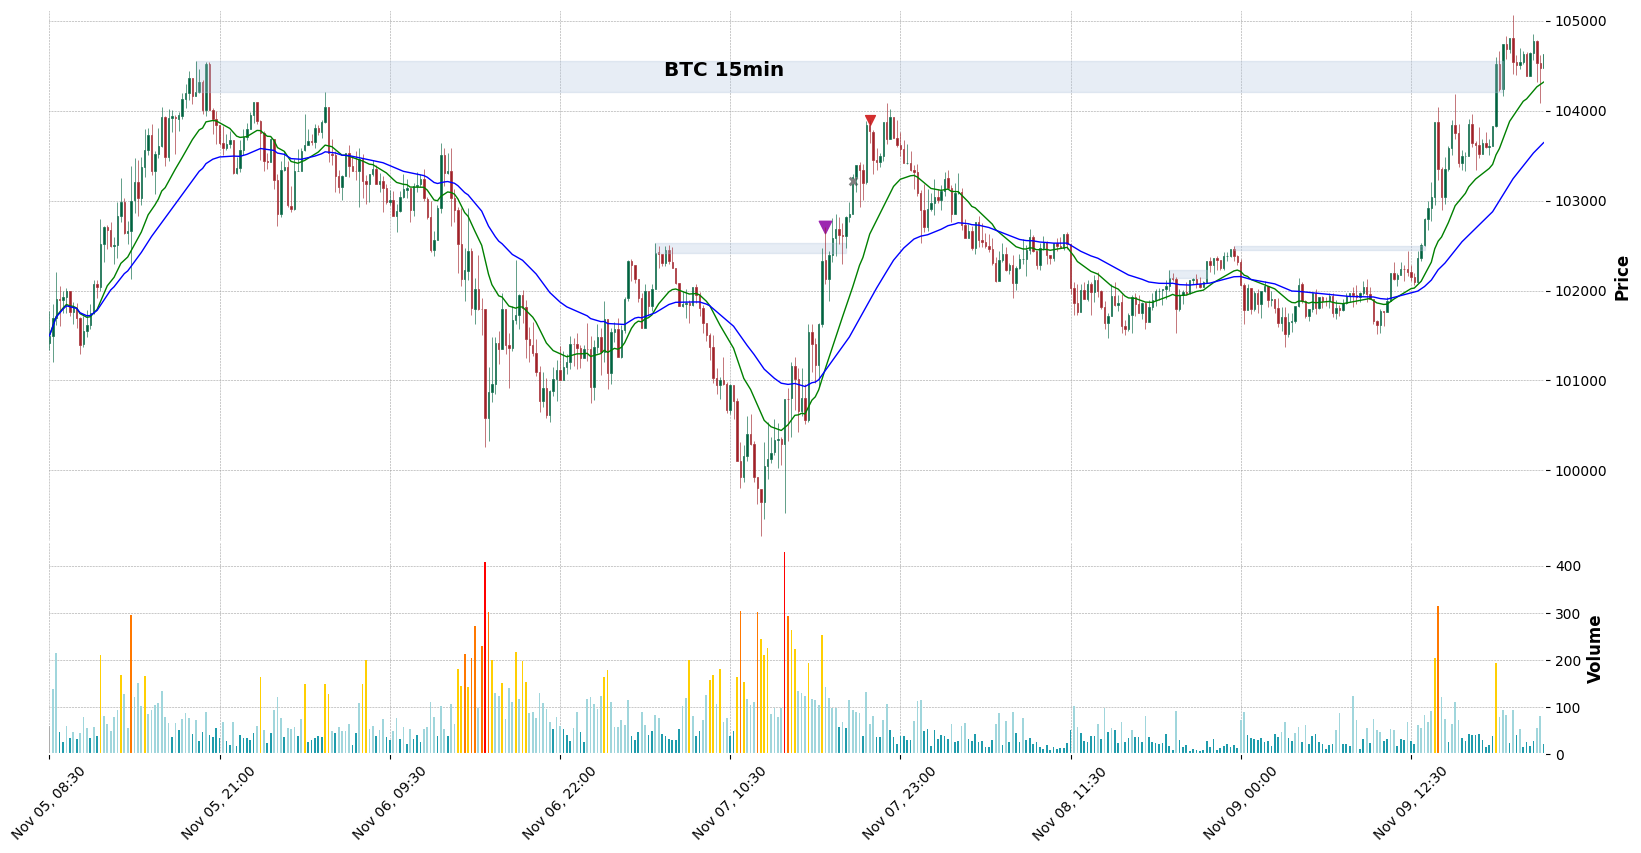

In [4]:
plotter.plot(btc_15m[1000:], title="BTC 15min")

In [5]:
btc_4h

,open,high,low,close,volume
timestamp,,,,,
2025-05-09 00:00:00+00:00,103269.9,103274.0,102349.7,102451.1,1182.973701
2025-05-09 04:00:00+00:00,102451.0,104366.0,102376.2,103630.0,2469.271777
2025-05-09 08:00:00+00:00,103629.9,103942.0,102415.9,102962.6,1730.087528
2025-05-09 12:00:00+00:00,102962.7,103791.1,102400.1,102904.0,1560.270248
2025-05-09 16:00:00+00:00,102904.7,103373.0,102300.0,103199.9,966.061391
...,...,...,...,...,...
2025-11-24 00:00:00+00:00,86846.7,88065.5,85948.8,87451.3,1356.754725
2025-11-24 04:00:00+00:00,87451.3,87837.0,86450.0,87045.4,1233.532559
2025-11-24 08:00:00+00:00,87045.5,87045.5,85685.8,86277.3,1315.670527


In [6]:
from backtesting import Backtest
from strategies.sr_short_strategy_bt import SRShortStrategy

df_bt = btc_4h.copy()
df_bt.columns = [c.capitalize() for c in df_bt.columns]

# 实例化回测
bt = Backtest(df_bt, SRShortStrategy, cash=1000000, commission=0.0004) # 0.04% commission

# 运行
stats = bt.run()
print(stats)

# 绘图
bt.plot()

Start                     2025-05-09 00:00...
End                       2025-11-24 16:00...
Duration                    199 days 16:00:00
Exposure Time [%]                    0.667223
Equity Final [$]                978396.788114
Equity Peak [$]                  1006505.7024
Return [%]                          -2.160321
Buy & Hold Return [%]              -13.675109
Return (Ann.) [%]                   -3.907408
Volatility (Ann.) [%]                2.750056
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -2.792723
Avg. Drawdown [%]                   -2.792723
Max. Drawdown Duration       50 days 00:00:00
Avg. Drawdown Duration       50 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                      -2.188002
Worst Trade [%]                     -2.188002
Avg. Trade [%]                    

Row(id='1609', ...)